In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ObesityDataSet.csv', sep=',', skipinitialspace=True, na_values="?")

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])
df.info()

Jumlah baris: 2111
Jumlah kolom: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [7]:
df.isnull().sum()

Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64

In [8]:
df.nunique()

Age                               1393
Gender                               2
Height                            1561
Weight                            1517
CALC                                 4
FAVC                                 2
FCVC                               807
NCP                                636
SCC                                  2
SMOKE                                2
CH2O                              1262
family_history_with_overweight       2
FAF                               1185
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(18)

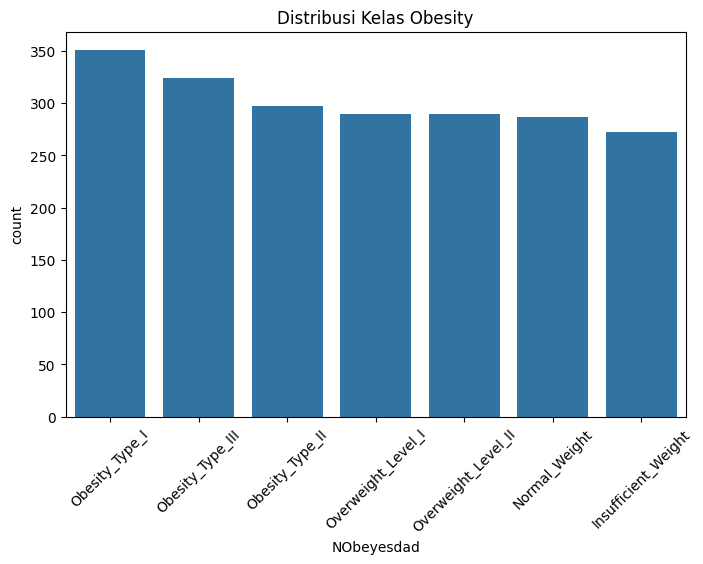

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kelas Obesity')
plt.xticks(rotation=45)
plt.show()

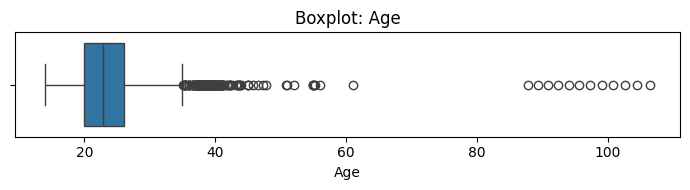

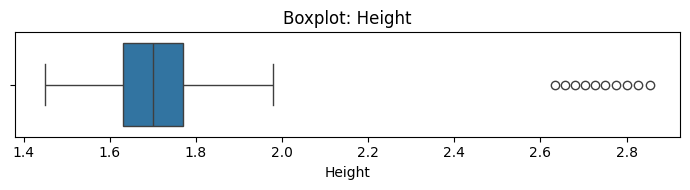

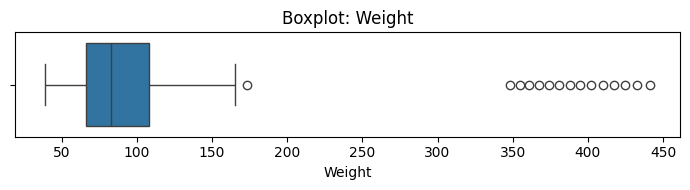

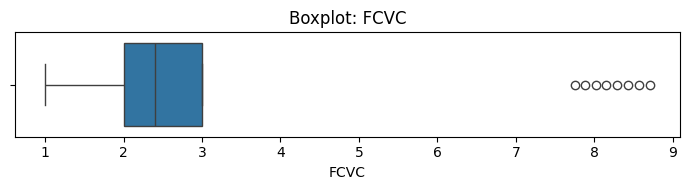

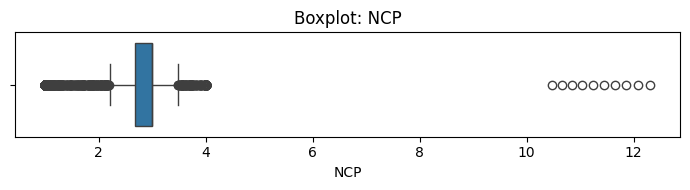

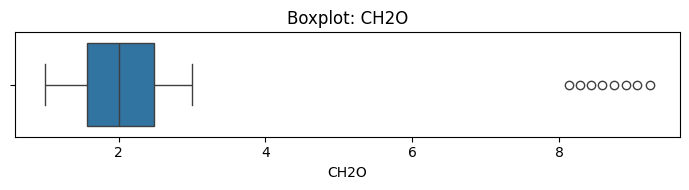

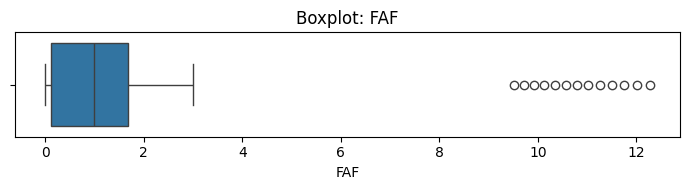

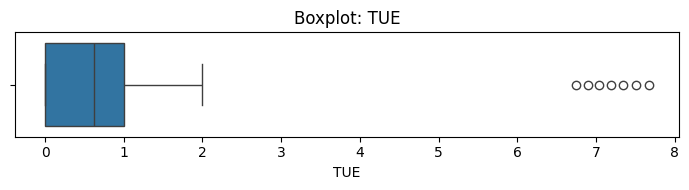

In [14]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    plt.figure(figsize=(7,2))
    sns.boxplot(x=pd.to_numeric(df[col], errors='coerce'))
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

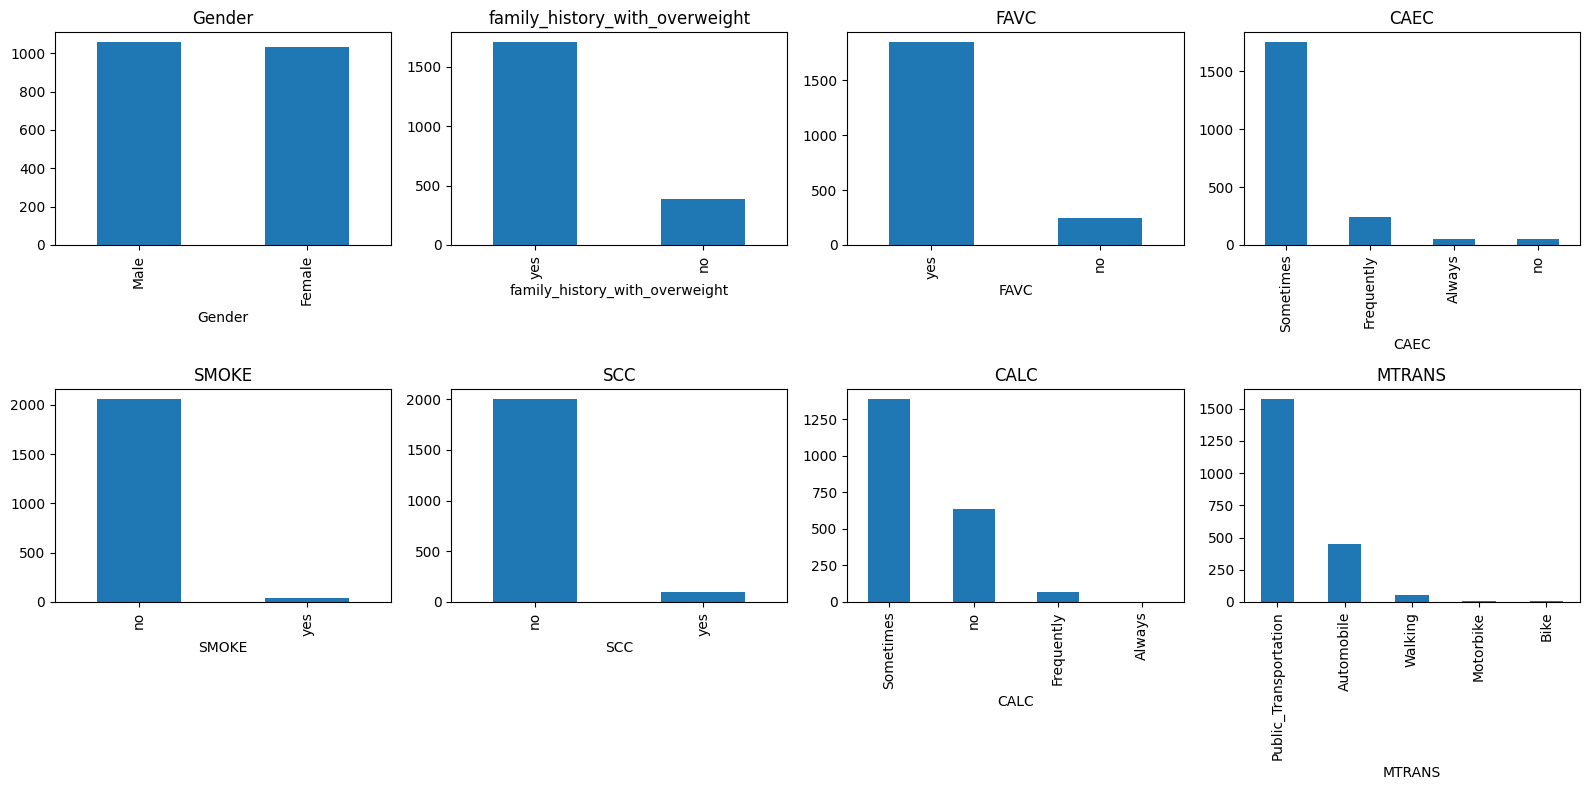

In [18]:
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(16,8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 4, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.tight_layout()
plt.show()

In [19]:
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    median = df[col].median()
    df[col] = df[col].fillna(median)

for col in categorical_cols:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

In [20]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [21]:
df = df.drop_duplicates()

In [22]:
for col in ['Height', 'Weight']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[col] >= lower) & (df[col] <= upper)]

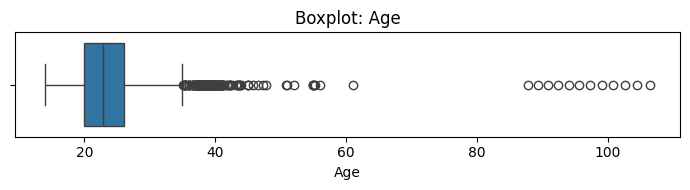

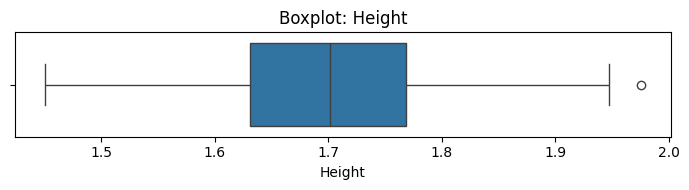

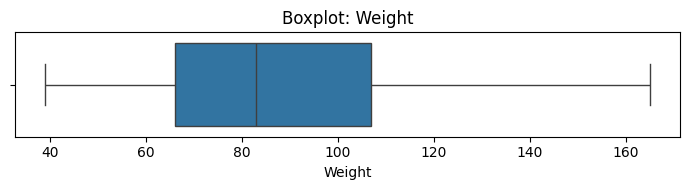

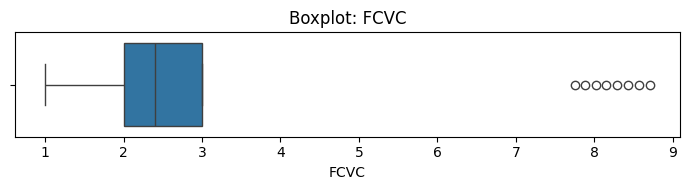

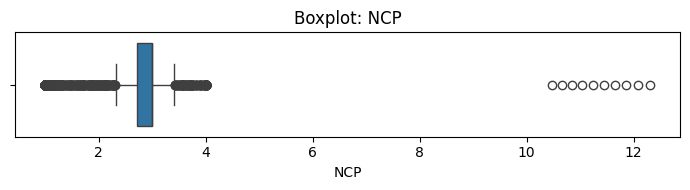

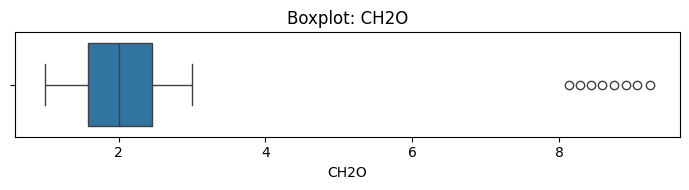

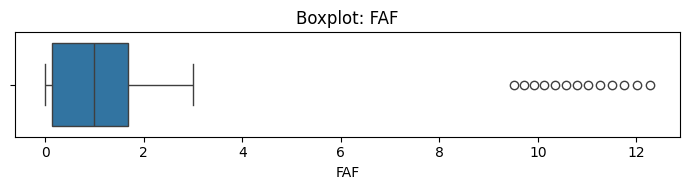

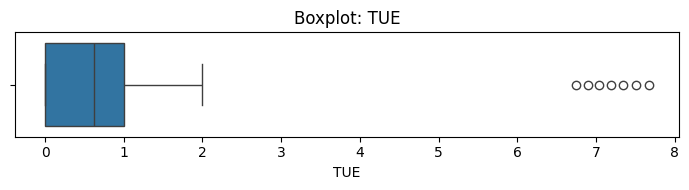

In [24]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    plt.figure(figsize=(7,2))
    sns.boxplot(x=pd.to_numeric(df[col], errors='coerce'))
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

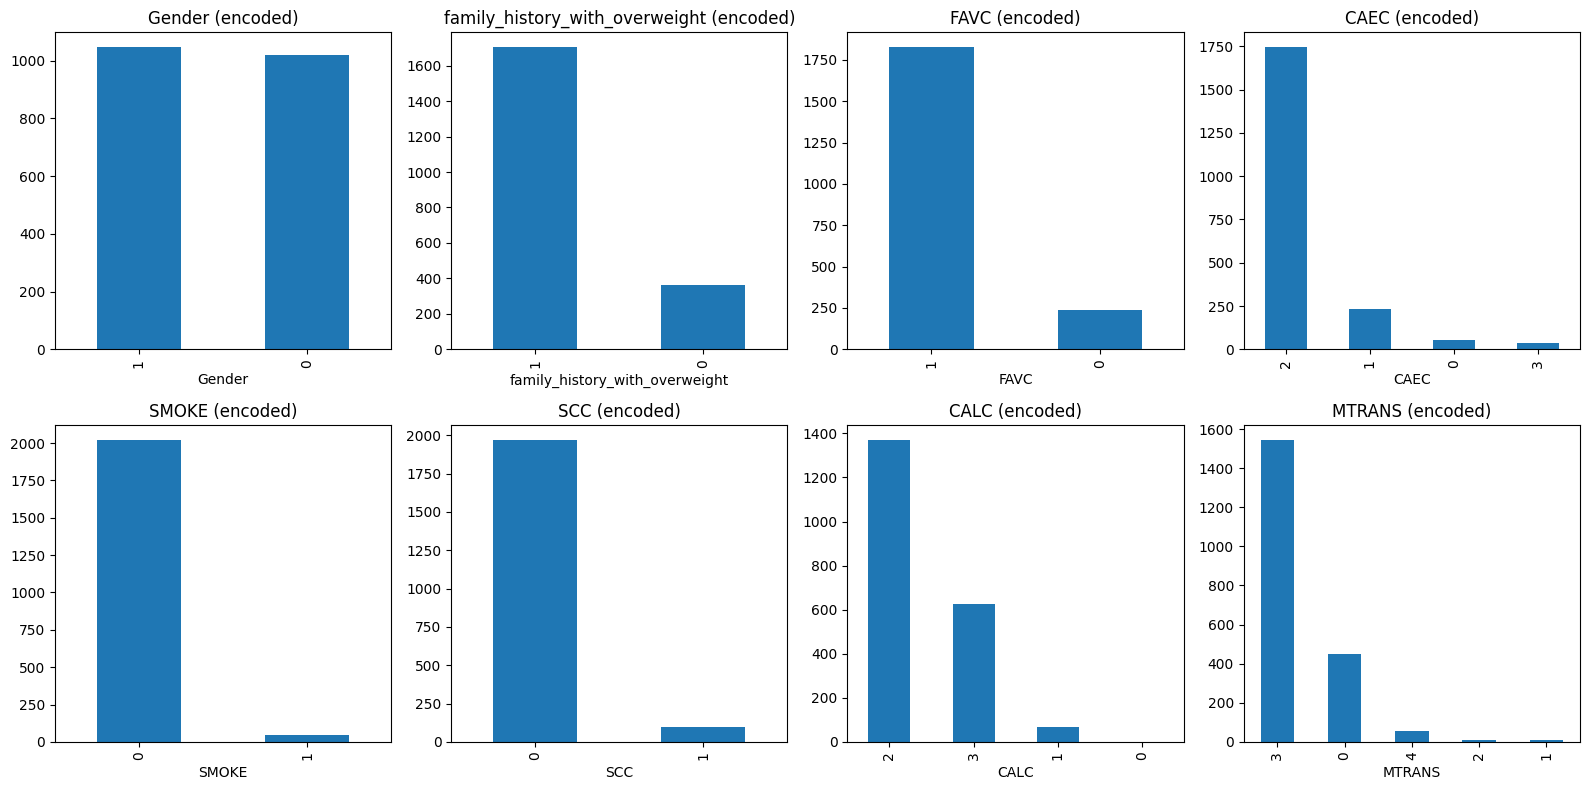

In [27]:
plt.figure(figsize=(16,8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 4, i)
    df_encoded[col].value_counts().plot(kind='bar')
    plt.title(f'{col} (encoded)')
    plt.tight_layout()
plt.show()

In [28]:
le_target = LabelEncoder()
df_encoded['NObeyesdad'] = le_target.fit_transform(df_encoded['NObeyesdad'])

In [29]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [30]:
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

In [31]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [33]:
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)
X_bal.shape

(2450, 16)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Logistic Regression
Akurasi: 0.8714285714285714
Presisi: 0.8762539423288894
Recall: 0.8714285714285714
F1-score: 0.8704183881437403
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.89      1.00      0.94        70
      Normal_Weight       0.92      0.70      0.80        70
     Obesity_Type_I       0.95      0.87      0.91        70
    Obesity_Type_II       0.92      0.97      0.94        70
   Obesity_Type_III       0.97      0.97      0.97        70
 Overweight_Level_I       0.74      0.76      0.75        70
Overweight_Level_II       0.74      0.83      0.78        70

           accuracy                           0.87       490
          macro avg       0.88      0.87      0.87       490
       weighted avg       0.88      0.87      0.87       490



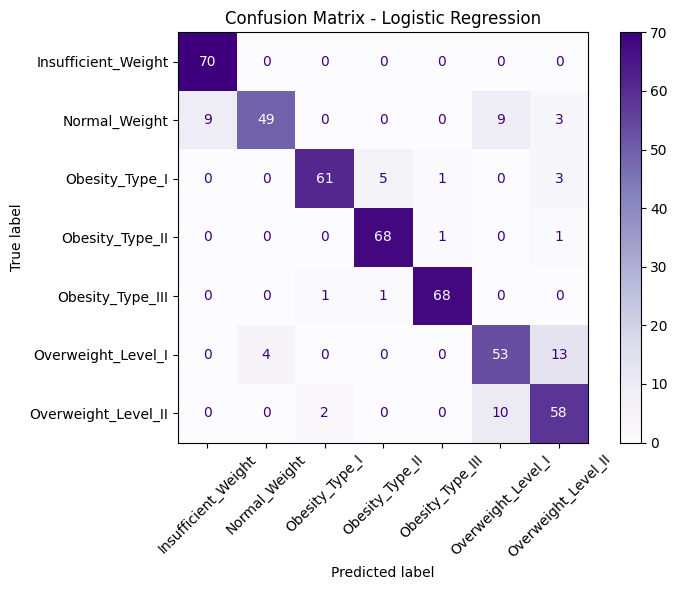

In [44]:
# Train
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluasi skor
print("Logistic Regression")
print("Akurasi:", accuracy_score(y_test, y_pred_lr))
print("Presisi:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=le_target.classes_))

# Confusion matrix visual
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le_target.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp_lr.plot(ax=ax, cmap='Purples', xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

K-Nearest Neighbors
Akurasi: 0.8510204081632653
Presisi: 0.8537391865064567
Recall: 0.8510204081632653
F1-score: 0.847225204842714
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.77      0.96      0.85        70
      Normal_Weight       0.84      0.59      0.69        70
     Obesity_Type_I       0.88      0.81      0.84        70
    Obesity_Type_II       0.92      0.99      0.95        70
   Obesity_Type_III       0.99      0.99      0.99        70
 Overweight_Level_I       0.76      0.83      0.79        70
Overweight_Level_II       0.82      0.80      0.81        70

           accuracy                           0.85       490
          macro avg       0.85      0.85      0.85       490
       weighted avg       0.85      0.85      0.85       490



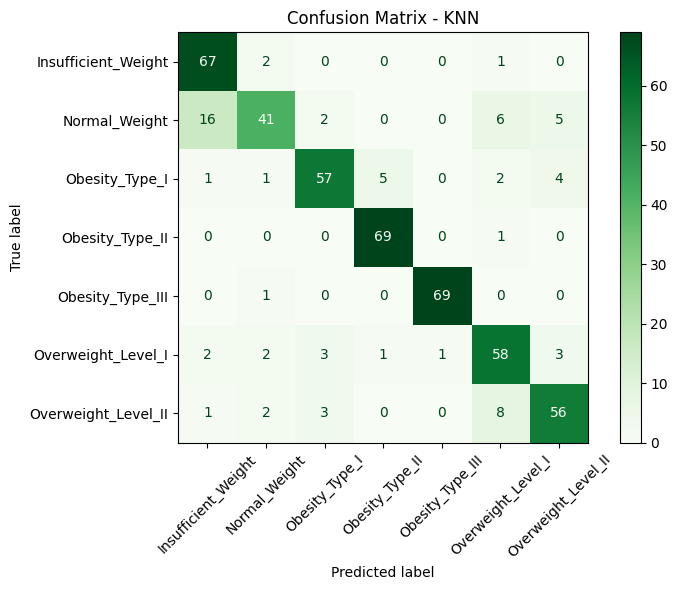

In [45]:
# Train
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluasi skor
print("K-Nearest Neighbors")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print("Presisi:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=le_target.classes_))

# Confusion matrix visual
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=le_target.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp_knn.plot(ax=ax, cmap='Greens', xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix - KNN")
plt.tight_layout()
plt.show()


Random Forest
Akurasi: 0.9469387755102041
Presisi: 0.949314557712765
Recall: 0.9469387755102041
F1-score: 0.9475160484767269
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.97      0.97      0.97        70
      Normal_Weight       0.86      0.93      0.89        70
     Obesity_Type_I       1.00      0.91      0.96        70
    Obesity_Type_II       1.00      0.97      0.99        70
   Obesity_Type_III       0.99      1.00      0.99        70
 Overweight_Level_I       0.96      0.93      0.94        70
Overweight_Level_II       0.88      0.91      0.90        70

           accuracy                           0.95       490
          macro avg       0.95      0.95      0.95       490
       weighted avg       0.95      0.95      0.95       490



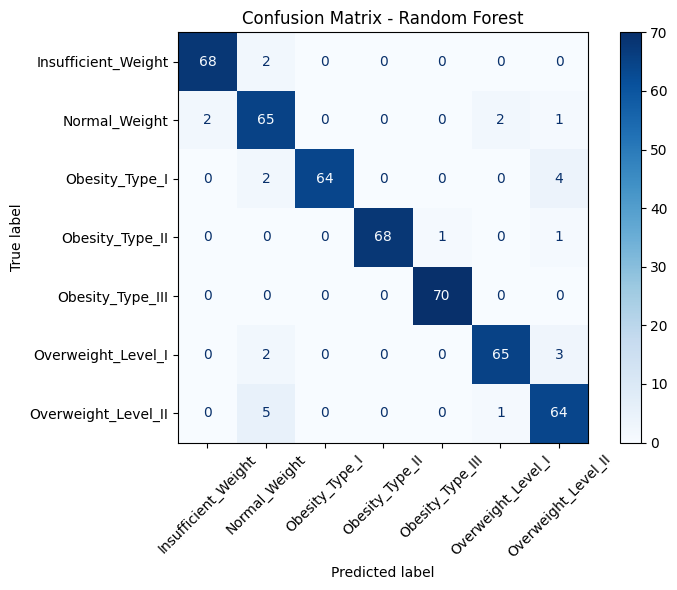

In [46]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluasi skor
print("Random Forest")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("Presisi:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le_target.classes_))

# Confusion matrix visual
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le_target.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp_rf.plot(ax=ax, cmap='Blues', xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

,Accuracy,Precision,Recall,F1
Logistic Regression,0.871429,0.876254,0.871429,0.870418
KNN,0.851020,0.853739,0.851020,0.847225
Random Forest,0.946939,0.949315,0.946939,0.947516


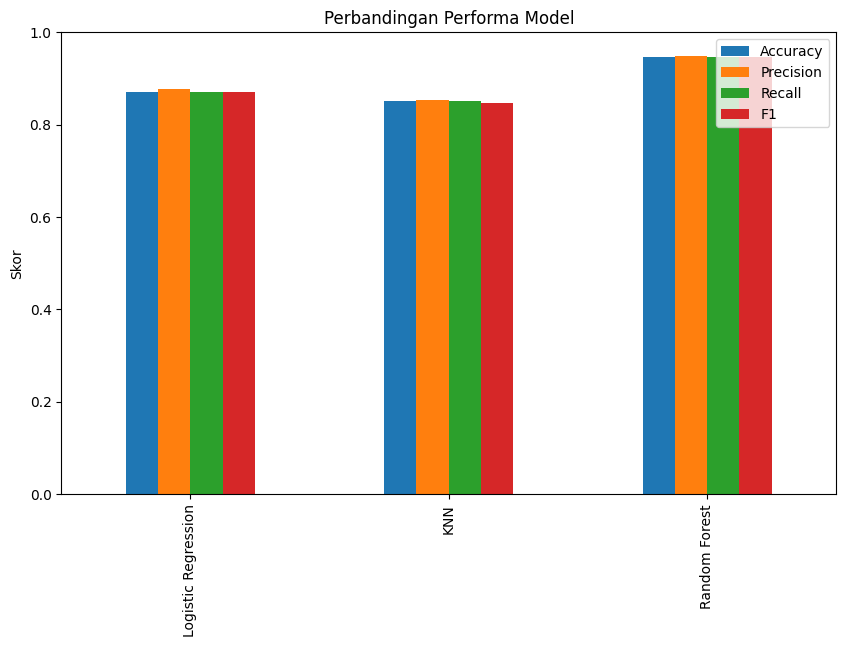

In [47]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest']
scores = [
    [accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr, average='weighted'), recall_score(y_test, y_pred_lr, average='weighted'), f1_score(y_test, y_pred_lr, average='weighted')],
    [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn, average='weighted'), recall_score(y_test, y_pred_knn, average='weighted'), f1_score(y_test, y_pred_knn, average='weighted')],
    [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf, average='weighted'), recall_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_rf, average='weighted')],
]
scores_df = pd.DataFrame(scores, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=model_names)
display(scores_df)

# Visualisasi skor
scores_df.plot(kind='bar', figsize=(10,6))
plt.title('Perbandingan Performa Model')
plt.ylabel('Skor')
plt.ylim(0, 1)
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

best_rf = grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Akurasi setelah tuning:", accuracy_score(y_test, y_pred_best_rf))
print("Classification report:\n", classification_report(y_test, y_pred_best_rf, target_names=le_target.classes_))


Best Params: {'max_depth': 15, 'min_samples_split': 6, 'n_estimators': 150}
Akurasi setelah tuning: 0.9448979591836735
Classification report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.99      0.97      0.98        70
      Normal_Weight       0.84      0.94      0.89        70
     Obesity_Type_I       1.00      0.94      0.97        70
    Obesity_Type_II       1.00      0.97      0.99        70
   Obesity_Type_III       0.99      1.00      0.99        70
 Overweight_Level_I       0.94      0.90      0.92        70
Overweight_Level_II       0.89      0.89      0.89        70

           accuracy                           0.94       490
          macro avg       0.95      0.94      0.95       490
       weighted avg       0.95      0.94      0.95       490



In [50]:
import joblib
joblib.dump(best_rf, 'model_obesitas.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(le_target, 'le_target.pkl')

['le_target.pkl']